In [81]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import json


In [82]:
mypath='D:/01.work/00.冰山科技/98.2020專案/氣象局資料/data2/'
allFileList = os.listdir(mypath)

In [83]:
allFileList

['radar_2020-03-10T1800.txt',
 'radar_2020-03-10T1810.txt',
 'radar_2020-03-10T1820.txt',
 'radar_2020-03-10T1830.txt',
 'radar_2020-03-10T1840.txt',
 'radar_2020-03-10T1850.txt',
 'radar_2020-03-10T1900.txt',
 'radar_2020-03-10T1920.txt']

In [84]:
RAD_level=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
RAD_cmap=['#ffffff','#0091ff','#0048ff','#00ff00','#00c800','#009600','#ffff00',
                      '#ffc800','#ff7800','#f50000','#be0000','#960000','#ff00ff','#9600ff']
cmap_test = LinearSegmentedColormap.from_list("my_colormap",colors=RAD_cmap, N=len(RAD_level), gamma=1.0)

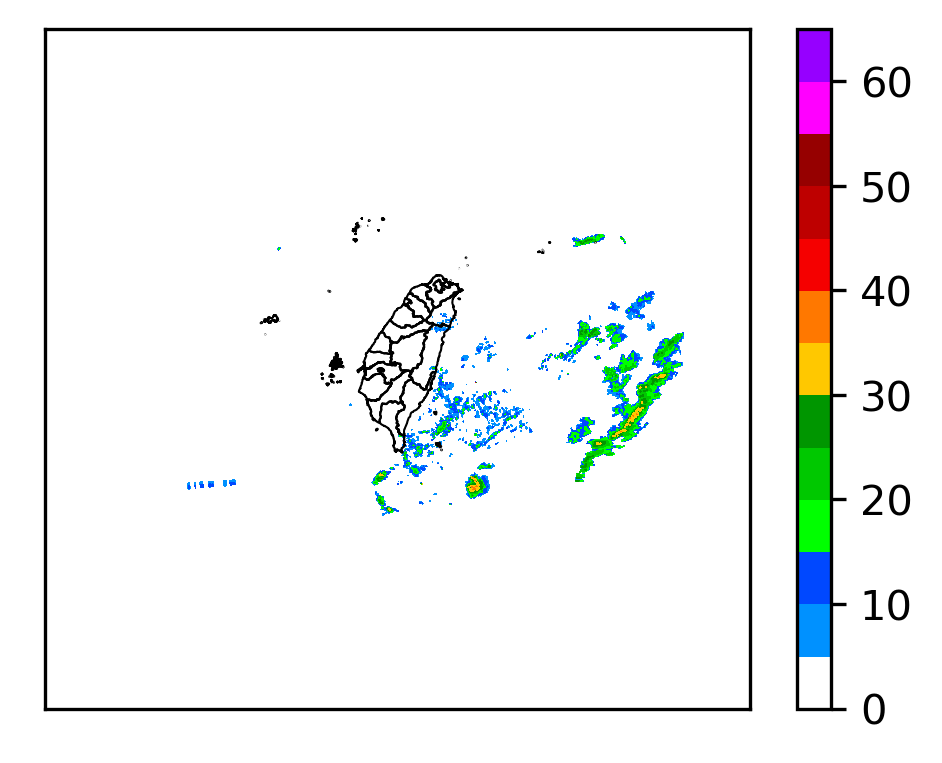

In [85]:

with open(mypath+allFileList[0],encoding='utf-8') as f:
    data=json.load(f)
    cd=data['cwbopendata']['dataset']['contents']['content']
    d=cd.split(',')
    e=np.array(d).astype('float')
    f=np.split(e, 881, axis=0)
    a=pd.DataFrame(f)
    b=a.T
    b.replace(-999.0, 0.0, inplace=True)
    b.replace(-99.0, 0.0, inplace=True)
    b[b<0]=np.nan
    b.replace('NaN', 0.0, inplace=True)
    m = Basemap(projection='cyl', llcrnrlat = 17,llcrnrlon = 114.0, urcrnrlat = 30.0125,urcrnrlon = 127.5125,epsg=3821)
    fig = plt.figure(figsize=(4,3), dpi=300)
    ax = fig.add_subplot(1, 1, 1)
    aaaa= m.readshapefile('COUNTY_67lon', name='COUNTY_67lon', drawbounds=True, 
                           ax=ax,default_encoding='iso-8859-15')
    X, Y = np.meshgrid(np.linspace(115,126.5125,921), np.linspace(18,28.0125,881))
    RAD_level=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
    RAD_cmap=['#ffffff','#0091ff','#0048ff','#00ff00','#00c800','#009600','#ffff00',
                      '#ffc800','#ff7800','#f50000','#be0000','#960000','#ff00ff','#9600ff']
    cmap_test = LinearSegmentedColormap.from_list("my_colormap",colors=RAD_cmap, N=len(RAD_level), gamma=1.0)
    cs = m.contourf(x=X, y=Y, data=a, ax=ax, cmap=cmap_test, levels=RAD_level)
    #ax.set_xticks(np.linspace(120,127,8))
    #ax.set_yticks(np.linspace(15,28,13))
    #ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':8})
    #ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':8})
    cbar = fig.colorbar(cs, ax=ax, shrink=1)
    cbar.ax.tick_params(labelsize=10)
    plt.savefig('./'+allFileList[i].rstrip('.txt')+'.png', dpi= 300)

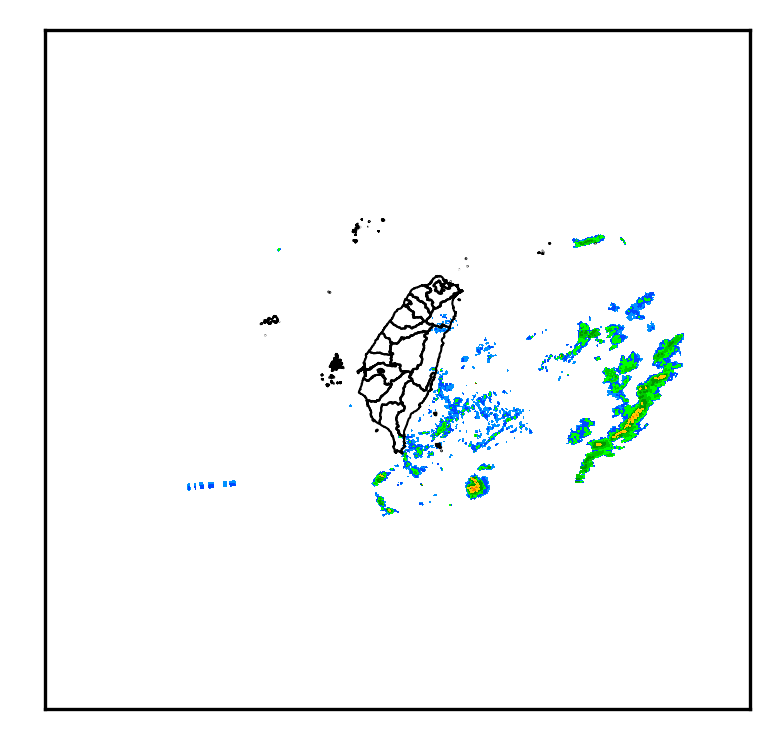

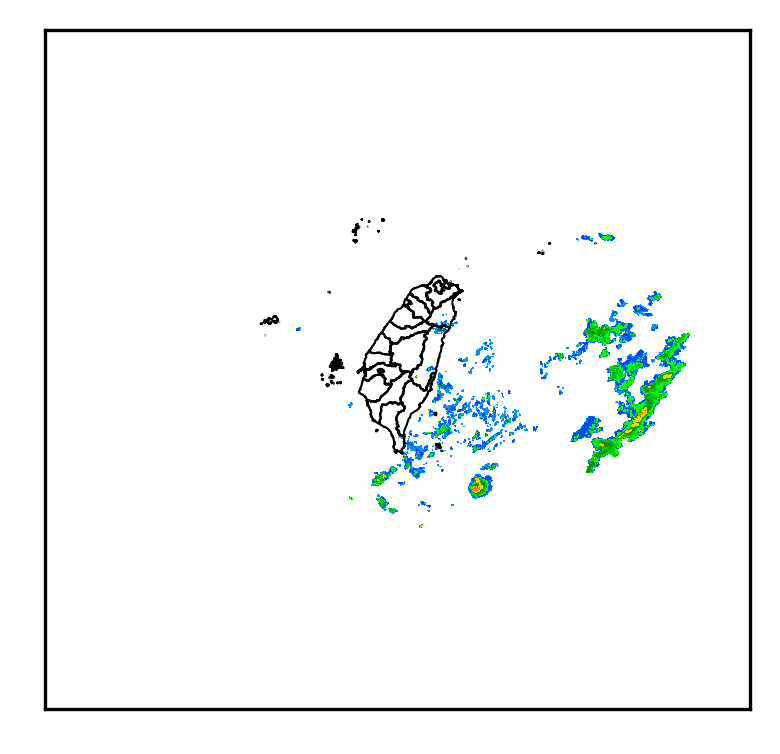

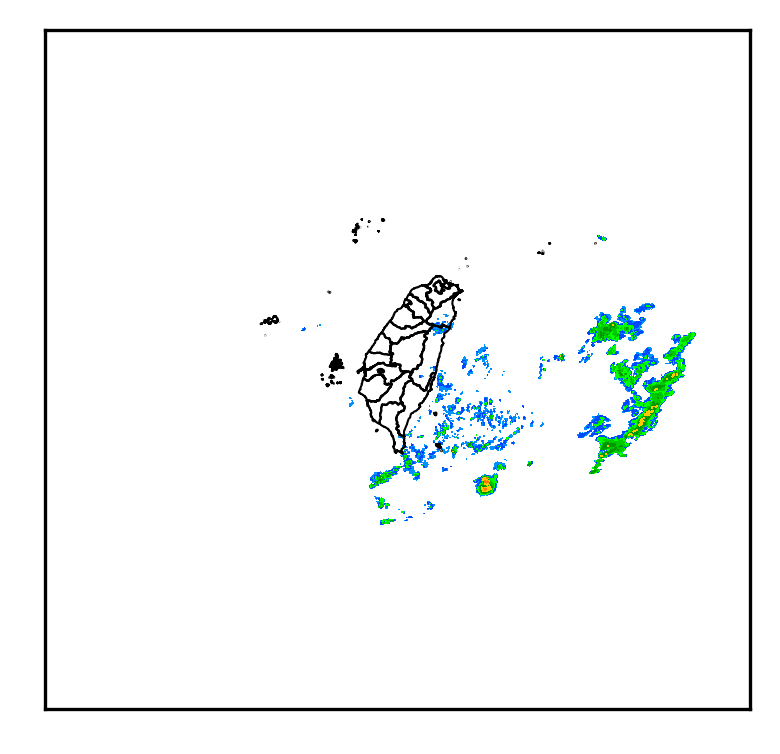

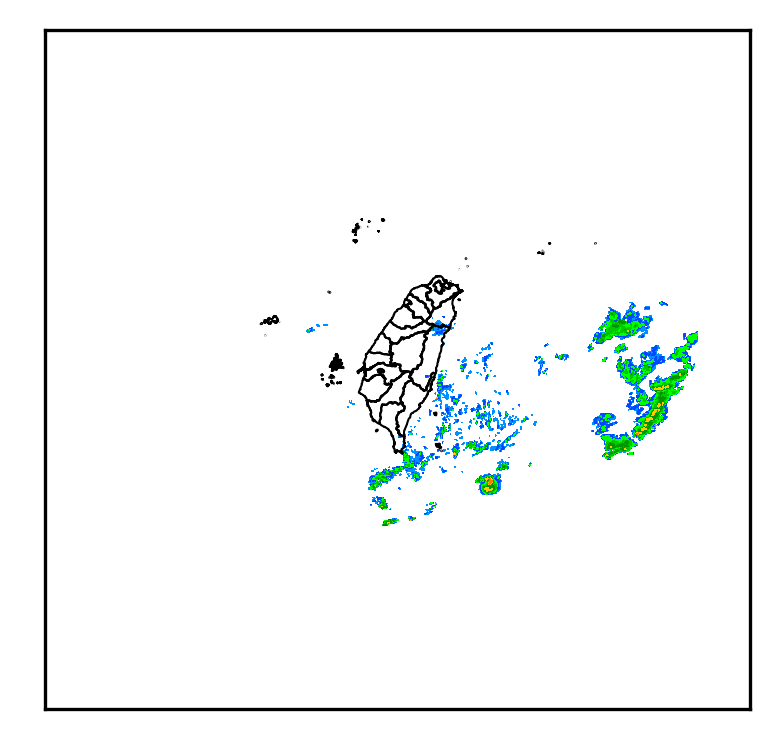

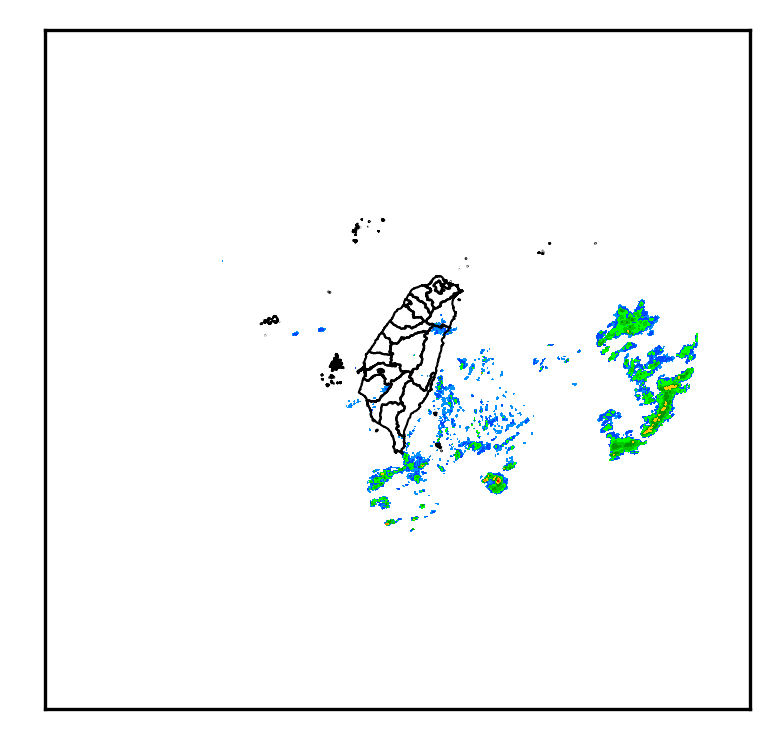

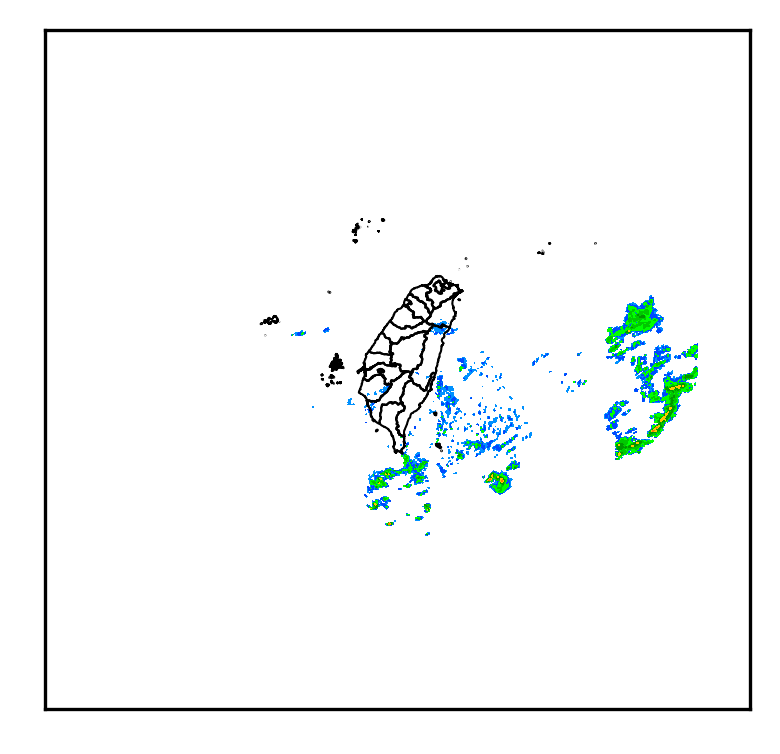

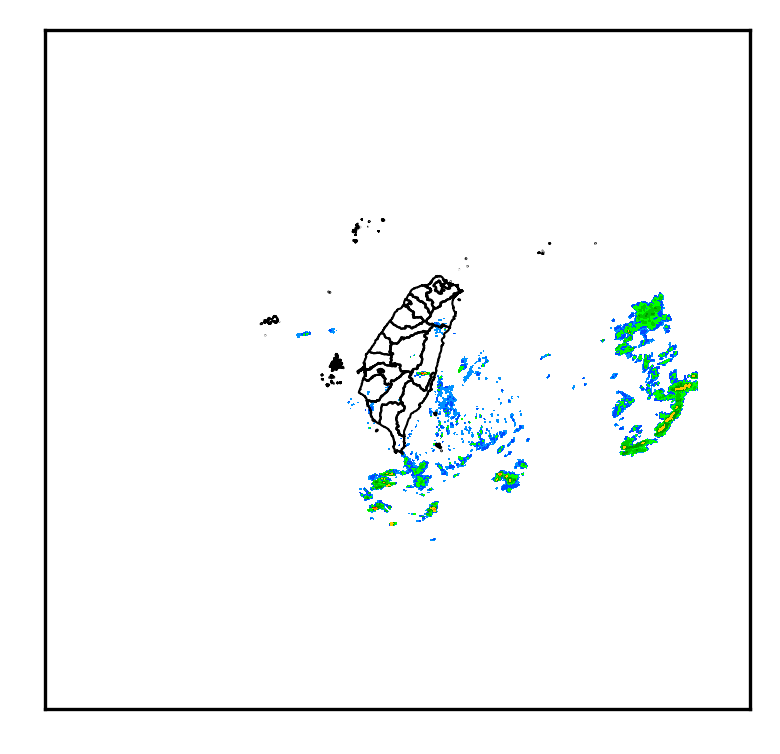

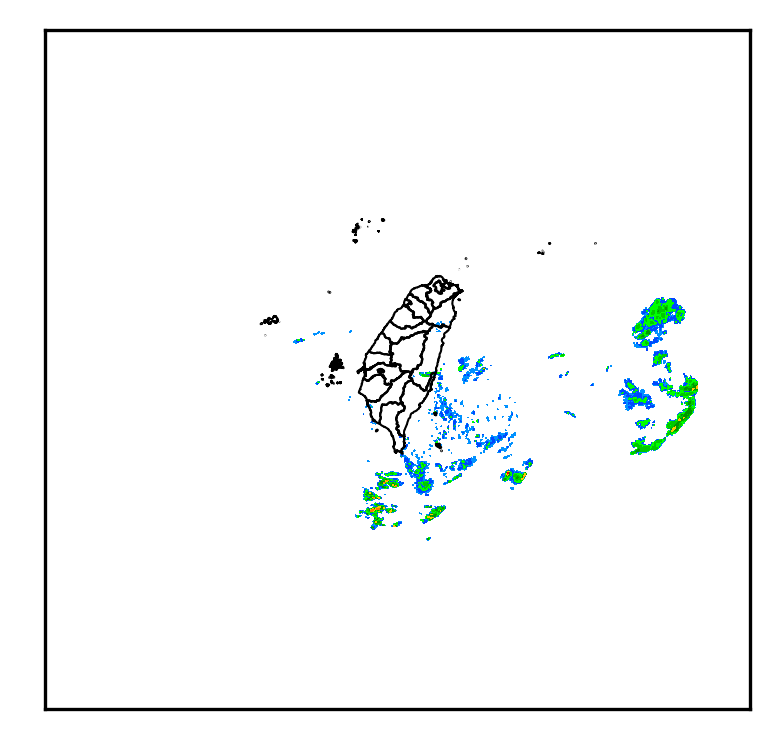

In [86]:
for i in range(len(allFileList)):
    with open(mypath+allFileList[i],encoding='utf-8') as f:
        try:
            data=json.load(f)
            cd=data['cwbopendata']['dataset']['contents']['content']
            d=cd.split(',')
            e=np.array(d).astype('float')
            f=np.split(e, 881, axis=0)
            a=pd.DataFrame(f)
            b=a.T
            b.replace(-999.0, 0.0, inplace=True)
            b.replace(-99.0, 0.0, inplace=True)
            b[b<0]=np.nan
            b.replace('NaN', 0.0, inplace=True)
            m = Basemap(projection='cyl', llcrnrlat = 17,llcrnrlon = 114.0, urcrnrlat = 30.0125,urcrnrlon = 127.5125,epsg=3821)
            fig = plt.figure(figsize=(4,3), dpi=300)
            ax = fig.add_subplot(1, 1, 1)
            aaaa= m.readshapefile('COUNTY_67lon', name='COUNTY_67lon', drawbounds=True, 
                           ax=ax,default_encoding='iso-8859-15')
            X, Y = np.meshgrid(np.linspace(115,126.5125,921), np.linspace(18,28.0125,881))
            RAD_level=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
            RAD_cmap=['#ffffff','#0091ff','#0048ff','#00ff00','#00c800','#009600','#ffff00',
                      '#ffc800','#ff7800','#f50000','#be0000','#960000','#ff00ff','#9600ff']
            cmap_test = LinearSegmentedColormap.from_list("my_colormap",colors=RAD_cmap, N=len(RAD_level), gamma=1.0)
            cs = m.contourf(x=X, y=Y, data=a, ax=ax, cmap=cmap_test, levels=RAD_level)
            #ax.set_xticks(np.linspace(120.5,122.5,5))
            #ax.set_yticks(np.linspace(24.5,25.5,6))
            #ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':8})
            #ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':8})
            #cbar = fig.colorbar(cs, ax=ax, shrink=1)
            #cbar.ax.tick_params(labelsize=10)
            plt.savefig('./'+allFileList[i].rstrip('.txt')+'.png', dpi= 300)
        except :
            print(allFileList[i]+" load failed!!!")